# HW 13 - Introduction to SciPy
ULAB - Physics and Astronomy Division
Due **Sunday, February 16th, 2025 at 11:59 PM** on Gradescope.

------

## 0 Academic Integrity

Please type the following message in the cell below as a comment. Sign with your name.

------

**I certify that I did not use AI tools, such as ChatGPT, to generate or write code for this assignment. All work submitted is my own and reflects my understanding of the material.**

------


In [15]:
# I certify that I did not use AI tools, such as ChatGPT, to generate or write code for this assignment. All work submitted is my own and reflects my understanding of the material.
# Nikolas Sommerhalter

## 1 Simulate a Pendulum
A simple pendulum follows the equation:

$$
\frac{\text{d}^2\theta}{\text{d}t^2} + \frac{g}{L}\sin(\theta) = 0
$$

The goal is to **numerically solve the equation** and compare it to the small-angle approximation.

***Small-Angle Approximation:** a mathematical simplification used in physics when dealing with osciallatory motion, particularly for pendulums and trigonometric funcitons in general.*

Import `numpy`, `matplotlib` and `solve_ivp` in the cell below.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Define the acceleration of gravity $g$ (two significant digits is fine) and the length of the pendulum $l$ in the cell below to **1 meter**.

In [19]:
g = 9.81
l = 1

Write a **function** called `pendulum` that contain the arguments `t` and `y`. Write out the differential equation. Follow the structure Brianna gave in lecture, it's very similar.

*Hint: The variable domega/dt should be equal to -(g / L) * np.sin(theta)*. I'll let you take care of the rest. 

In [89]:
def pendulum(t,y):
    theta, omega = y
    dthetadt = omega
    domegadt = - g/l * np.sin(theta)
    return dthetadt, domegadt

Give you equation some initial conditions. Run the cell below.

In [91]:
theta_0 = np.radians(10) # Convert 10 degrees to radians
omega_0 = 0.0 # Initial angular velocity

Solve the differential equation using `solve_ivp`. Set the simulation time to **10 seconds** and the time for evaluation to **10 steps**.

In [105]:
y0 = [theta_0, omega_0]
t_span = (0,10)
t_eval = np.linspace(0,10,10)
sol = solve_ivp(pendulum, t_span, y0, t_eval = t_eval)

Extrac the **theta** values (`sol.y`) and the **time** values (`sol.t`).

In [111]:
theta_values = sol.y[0]
time_values = sol.t

Calculate the theoretical period (aka small-angle approximation).

*Hint: Use `2 * np.pi * np.sqrt(L / g)`.*

In [55]:
period = 2 * np.pi * np.sqrt(l/g)

Print out the theoretical period (small-angle approximation) to **two** significant digits.

In [59]:
print(period)

2.0060666807106475


Estimate the period from simulation by finding the first zero crossing. Run the cell below.

In [113]:
zero_crossings = np.where(np.diff(np.sign(theta_values)))[0]
if len(zero_crossings) >= 2:
    T_numerical = 2 * (time_values[zero_crossings[1]] - time_values[zero_crossings[0]])
else:
    T_numerical = None

Plot the results in the cell below. Add a **horizontal** line at `x=0`, give it an `x_label` of **Time (s)**, a `y_label` of **Theta (radians)** and a title.

Text(0.5, 1.0, 'time vs theta')

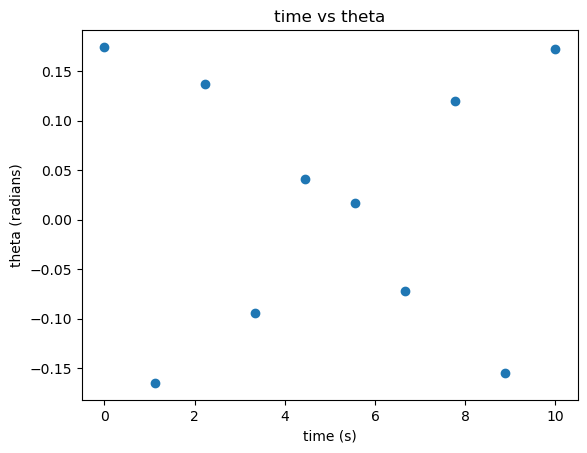

In [119]:
plt.scatter(time_values, theta_values)
plt.xlabel("time (s)")
plt.ylabel("theta (radians)")
plt.title("time vs theta")

Print out the numerical period (what you calculated with scipy) to **four** significant digits.

In [121]:
print(T_numerical)

2.2222222222222223


Compare the results between the small-angle approximation and numerical calculation. How well does the approximation match the numerical result?

In [123]:
# The are relatively close (0.22 off).

## 2 Using Curve_Fit with Covid-19 Data
Import `pandas` in the cell below.

In [125]:
import pandas as pd

Run the cell below. If that doesn't work, then just **paste** the link into a web browser and it should automatically download. Then you can put the `.csv` file in the same directory as this notebook.

In [127]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

With the `pandas` function `read_csv`, import the data in the cell below as a dataframe `df`.

In [129]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

Select **United States** as the country and make a new data frame called `df_country` with only this information.

In [225]:
country = ['United States']
contains_us = df['location'].isin(country)
df_country = df[contains_us]

From your `df_country` dataframe, extract only the relevant columns: **"date"** and **"total_cases"**. 

*Hint: Use `.dropna()` to get rid of the other data.*

In your `df_country` dataframe, add a new column called **"days since start"** and covert the data to numerical days.

*Hint: You can just take the length of your dataframe (`range(len(df_country))`).*

In [237]:
df_country = df_country[["date", "total_cases"]]
days_since_start = range(len(df_country))
df_country["days_since_start"] = days_since_start

###### Print the first few rows of your `df_country` dataframe.

In [239]:
print(df_country)

              date  total_cases  days_since_start
403451  2020-01-05          0.0                 0
403452  2020-01-06          0.0                 1
403453  2020-01-07          0.0                 2
403454  2020-01-08          0.0                 3
403455  2020-01-09          0.0                 4
...            ...          ...               ...
405120  2024-07-31  103436829.0              1669
405121  2024-08-01  103436829.0              1670
405122  2024-08-02  103436829.0              1671
405123  2024-08-03  103436829.0              1672
405124  2024-08-04  103436829.0              1673

[1674 rows x 3 columns]


In the cell below, import `curve_fit`. Make sure to have `numpy` imported in this notebook as well.

In [233]:
from scipy.optimize import curve_fit

### Some background:
At the beginning of an outbreak, the number of cases follows an exponential growth model:

$$
C(t) = C_0 e^{rt}
$$

where
* $C(t)$ = number of cases at time $t$.
* $C_0$ = initial number of cases.
* $r$ = growth rate.
* $t$ = time in days.

Write a **function** called `exponential_growth` that takes in arguments `t`, `C_0` and `r`. Return the function given above.

In [235]:
def exponential_growth(t, C_0, r):
    return C_0*np.exp(r*t)

Make a new variable called `days` and another new variable called `cases`. To the `days` variable give it the first 30 rows (your column **"days_since_start"**) and to the `cases` variable give it the first 30 rows (your column **"total_cases"**).

In [247]:
days = df_country["days_since_start"][0:30]
cases = df_country["total_cases"][0:30]

With `curve_fit` fit the model. Give it the argument `p0 = [1, 0.1]`.

In [249]:
p0 = [1, 0.1]
popt, pcov = curve_fit(exponential_growth, days, cases, p0)

Extract the best-fit parameters from `popt`. Call them `C0_fit` and `r_fit`.

In [251]:
C0_fit, r_fit = popt

Print your variables `C0_fit` with **two** significant digits. Print your variables `r_fit` with **four** significant digits.

In [253]:
print(C0_fit)
print(r_fit)

0.12389530637464054
0.15384247140899723


Make sure to have `matplotlib` imported. Make a variable called `future_days` give it a numpy range from `0` to `60`. We want to predict up to 60 days.

In [285]:
import matplotlib.pyplot as plt
future_days = np.array(list(range(60)))
print(future_days)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


Make a variable called `predicted_cases` set it equal to your function `exponential_growth` with inputs being `future_days` and your `curve_fit` outputs. 

*Hint: You will want to use `*popt` as your `curve_fit` input.*

In [287]:
predicted_cases = exponential_growth(future_days, *popt)
print(predicted_cases)

[1.23895306e-01 1.44499981e-01 1.68531361e-01 1.96559330e-01
 2.29248551e-01 2.67374223e-01 3.11840467e-01 3.63701765e-01
 4.24187968e-01 4.94733458e-01 5.77011167e-01 6.72972247e-01
 7.84892340e-01 9.15425545e-01 1.06766735e+00 1.24522806e+00
 1.45231839e+00 1.69384932e+00 1.97554856e+00 2.30409640e+00
 2.68728410e+00 3.13419865e+00 3.65543828e+00 4.26336378e+00
 4.97239164e+00 5.79933590e+00 6.76380691e+00 7.88867632e+00
 9.20061957e+00 1.07307483e+01 1.25153485e+01 1.45967404e+01
 1.70242826e+01 1.98555424e+01 2.31576610e+01 2.70089455e+01
 3.15007261e+01 3.67395220e+01 4.28495670e+01 4.99757562e+01
 5.82870815e+01 6.79806397e+01 7.92863058e+01 9.24721851e+01
 1.07850970e+02 1.25787357e+02 1.46706694e+02 1.71105065e+02
 1.99561060e+02 2.32749490e+02 2.71457393e+02 3.16602698e+02
 3.69255989e+02 4.30665898e+02 5.02288714e+02 5.85822917e+02
 6.83249454e+02 7.96878720e+02 9.29405346e+02 1.08397210e+03]


**Scater** the variable `cases` as a function of `days`. **Plot** the variable `future_days` as a function of `predicted_cases`. 

Don't forget a label for your x-axis, y-axis, title and legend.

(0.0, 60.0)

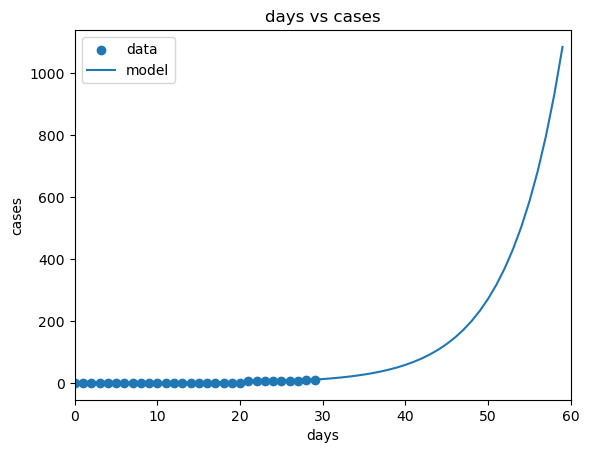

In [291]:
plt.scatter(days, cases, label = 'data')
plt.plot(future_days, predicted_cases, label = 'model')
plt.xlabel("days")
plt.ylabel("cases")
plt.title("days vs cases")
plt.legend()
plt.xlim(0,60)

How well does your exponential model fit the actual COVID-19 data? 

In [293]:
# It seems to fit the actual data pretty well.

Make another plot but this time to **90 days**.

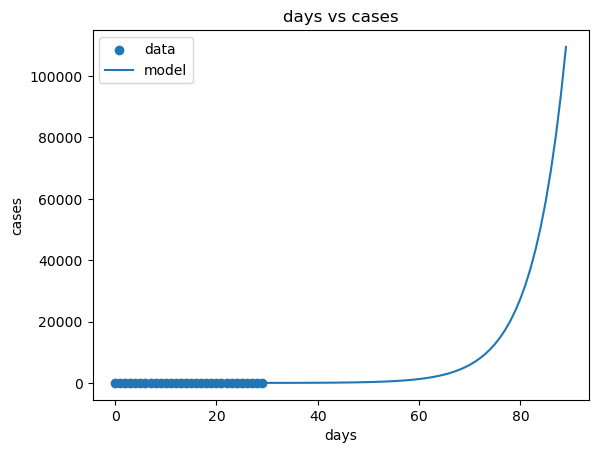

In [297]:
future_days = np.array(list(range(90)))
predicted_cases = exponential_growth(future_days, *popt)
plt.scatter(days, cases, label = 'data')
plt.plot(future_days, predicted_cases, label = 'model')
plt.xlabel("days")
plt.ylabel("cases")
plt.title("days vs cases")
plt.legend()

What does your model predict the number of cases to be at 87 days? Print in the cell below.

In [299]:
print(predicted_cases[87])

80497.11619903105


## 3 Seaborn
Use Seaborn to visualize your data, NOT matplotlib. 
1) Go to this website and **pick a dataset that interest you**: https://github.com/mwaskom/seaborn-data
2) Go to this website for documentation: https://seaborn.pydata.org/index.html
3) Import seaborn data (*Hint: You can use the function `sns.load dataset()`. For example, `sns.load dataset('planets')`.*
4) Make a cool plot!
5) With `scipy` add a model to your data. (This can be a different plot.)

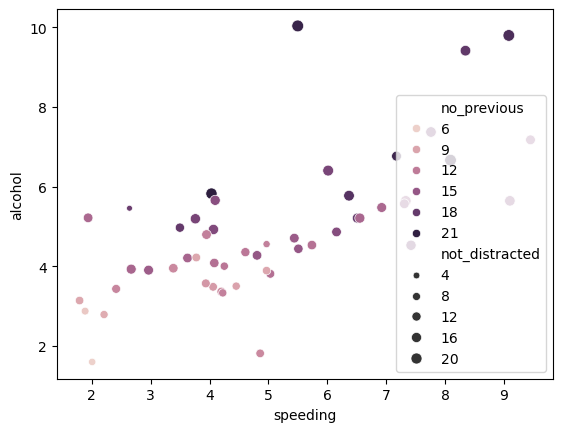

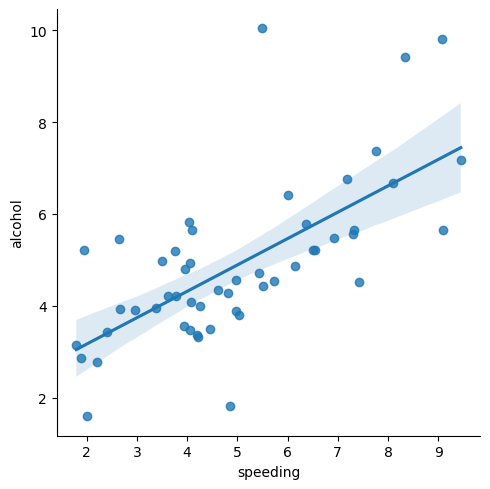

In [329]:
import seaborn as sns

dataset = sns.load_dataset('car_crashes')
sns.scatterplot(x = dataset['speeding'], y = dataset['alcohol'], hue = dataset['no_previous'], size = dataset['not_distracted'])
sns.lmplot(
    data=dataset, x="speeding", y="alcohol"
)

On it's own branch, submit this notebook to Gradescope! 